# EDA preliminar

In [8]:
#Importamos las librería necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [9]:
#Importamos los datasets correspondiente a Yelp
df_yelp_business=pd.read_csv('yelp_business_florida.csv')
df_yelp_reviews=pd.read_csv('yelp_reviews_florida.csv')
df_yelp_users=pd.read_csv('yelp_users_florida.csv')

En la data de YELP, tenemos en df_yelp_business información sobre los restaurantes en Florida, en df_yelp_reviews información sobre las reviews restaurantes de usuarios de Florida y en df_yelp_users los usuarios de Florida.

In [10]:
#Importamos los datasets correspondiente a Yelp
df_gmap_business=df_gmap_metadata=pd.read_csv('gmap_metadata_florida.csv')
df_gmap_reviews=pd.read_csv('gmap_state_florida.csv')

En la data de Google Maps, tenemos en gmap_metadata información sobre los negocios del rubro restaurant en Florida de Google Maps, y en gmap_state las reviews de restaurantes de los usuarios de Florida.

### Outliers

In [16]:
#Creamos la función para detectar los outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [17]:
#Detectamos los outliers en los negocios de yelp
outliers_yelp_business = detect_outliers_iqr(df_yelp_business, 'review_count')
outliers_yelp_business

,business_id,name,address,city,state,latitude,longitude,stars,review_count,categories
24,j9Kaj_6tSeXmVMYCgZithg,Noble Crust,28330 Paseo Dr,Wesley Chapel,FL,28.188219,-82.347274,4.5,496,"Restaurants, Italian, Nightlife, Southern, Bar..."
31,dIpTuL2T1L98GQGU17IeSw,The Bricks,1327 E 7th Ave,Tampa,FL,27.960024,-82.444401,4.0,548,"Bars, Breakfast & Brunch, Restaurants, America..."
45,71U7MxQEhwitJOm4CQpRwQ,KELP Sushi Joint,"3401 W Bay To Bay Blvd, Ste D",Tampa,FL,27.920067,-82.498921,4.0,325,"Japanese, Sushi Bars, Food, Restaurants, Asian..."
56,rBE5TT_ndOOczNBrbRnJwA,Dio Modern Mediteranean,519 N Franklin St,Tampa,FL,27.949120,-82.458399,4.0,325,"Greek, Restaurants, Mediterranean"
57,oRZzKWdyMQld6N_y4UWkAg,Terra Sur Cafe,"5330 Ehrlich Rd, Ste 103",Tampa,FL,28.081928,-82.539148,4.0,316,"Latin American, Restaurants, Peruvian, Seafood"
...,...,...,...,...,...,...,...,...,...,...
8704,PM_WuWyoqrKf20vYcD6ihQ,Lotus Vegan Restaurant,6575 Park Blvd N,Pinellas Park,FL,27.839481,-82.727840,4.5,261,"Vegan, Vietnamese, Restaurants, Vegetarian"
8710,0a9Miij7BFmKm83Iqni5sA,Capital Tacos,"27209 State Rd 56, Fl 56",Wesley Chapel,FL,28.186629,-82.366184,4.0,754,"Restaurants, Tacos, Mexican, Tex-Mex"
8713,ny1N_Py01kVoGOvL9oKjMQ,Cask Social Kitchen,208 S Howard Ave,Tampa,FL,27.942668,-82.482716,4.0,578,"Breakfast & Brunch, Restaurants, Southern, Ame..."
8721,XtuWejrrZMZGkRMxxesKJw,Johnny Grits Southern Fresh,5749 Main St,New Port Richey,FL,28.250360,-82.718935,3.5,224,"Breakfast & Brunch, Restaurants, Comfort Food,..."


In [18]:
#Detectamos los outliers en las reviews de yelp
outliers_yelp_reviews = detect_outliers_iqr(df_yelp_reviews, 'stars')
outliers_yelp_reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name,address,city,state,latitude,longitude,stars_y,review_count,categories


In [19]:
#Detectamos los outliers en los users de yelp
outliers_yelp_users = detect_outliers_iqr(df_yelp_users, 'review_count')
outliers_yelp_users 

,user_id,name,review_count,yelping_since,average_stars
0,rppTTi-kfF8-qyiArNemag,Helen,460,2006-01-24 14:33:32,3.33
1,q7iWal_rXNSHkHeCMMvZxQ,Stephanie,500,2011-06-01 21:02:59,3.95
2,K7thO1n-vZ9PFYiC7nTR2w,Yelper,1554,2007-12-26 23:05:41,3.68
3,asAdx4Q3cAMykgPgtQt6cg,Sylvester,123,2010-08-31 13:25:09,4.20
4,2Od6rQYNvPUXQC2Go7vIqg,Catherine,986,2007-08-22 17:13:14,3.63
...,...,...,...,...,...
190244,aS4cEWRPdtP1kObPtfCdcA,Tom,58,2015-02-25 04:36:10,4.32
190249,wShbnvmF9-J7RrGECDNwfQ,Matt,91,2014-12-31 23:22:41,4.59
190250,d-U_47DSQnAy2zcGKy7TYA,AJ,267,2011-11-26 19:41:00,3.58
190251,nzQKLAc6q_v4fDjMxEqPYQ,Candice,59,2014-05-11 12:53:43,4.39


In [20]:
#Detectamos los outliers en los negocios de Google Maps
outliers_gmap_business = detect_outliers_iqr(df_gmap_business, 'avg_rating')
outliers_gmap_business

,name,address,gmap_id,category,avg_rating,state,contains_keyword
4,Shell,"Shell, 15877 E, FL-40, Silver Springs, FL 34488",0x88e635378f43352f:0xa1b53c63436fa428,"['Gas station', 'ATM', 'Convenience store', 'R...",1.8,FL,True
13,SUBWAY®Restaurants,"SUBWAY®Restaurants, 5 S Fletcher Rd, Chelsea, ...",0x883cc9750a456b4f:0x1842fa7ecb22156a,"['Restaurant', 'Caterer', 'Fast food restauran...",2.3,FL,True
16,India Diner,"India Diner, 4561 W Irlo Bronson Memorial Hwy,...",0x88dd83d661b9262f:0xbc3de0d8abe6423b,['Indian restaurant'],2.2,FL,True
23,Flock and Stock,"Flock and Stock, 615 Channelside Dr, Tampa, FL...",0x88c2c5c515fa6e53:0xee4f630ca314fe01,['Restaurant'],2.8,FL,True
47,Flaming Garcia,"Flaming Garcia, 5050 Rocklin Rd, Rocklin, CA 9...",0x809b1ef9859a4c25:0xcfbc2d9fcb5e3b2e,['Mexican restaurant'],2.5,FL,True
...,...,...,...,...,...,...,...
17125,Subway,"Subway, 5105 Co Rd 218, Middleburg, FL 32068",0x88e5e60450178207:0xde657c0f0184d419,"['Sandwich shop', 'Caterer', 'Fast food restau...",2.7,FL,True
17144,AND Fish Kitchen + Bar,"AND Fish Kitchen + Bar, 1200 N Ocean Blvd, Pom...",0x88d8fdda0b8b9e7d:0x7f7cabaaa86960e,"['Restaurant', 'Bar & grill', 'Seafood restaur...",2.7,FL,True
17218,Baskin Robbins,"Baskin Robbins, 12397 Sheridan St, Hollywood, ...",0x87c058091d77d385:0x8e4e5e642ba2149,"['Ice cream shop', 'Dessert restaurant']",1.0,FL,True
17227,The Chatty Crab Shack,"The Chatty Crab Shack, 9041 Southside Blvd #13...",0x88e5cb0e0b94b0d9:0x936362c3ecfaed32,"['Restaurant', 'Sports bar']",2.5,FL,True


In [21]:
outliers_gmap_reviews = detect_outliers_iqr(df_gmap_reviews, 'rating')
outliers_gmap_reviews

,name_x,gmap_id,category,state,user_id,time,rating,text
1,Gormley's on the river | Modern cuisine in his...,0x8894b5a7a7909725:0xe4687299fd288188,"['Modern French restaurant', 'Restaurant']",FL,1.059416e+20,2018-09-20,1,"Love this place. Great little restaurant, with..."
7,Gormley's on the river | Modern cuisine in his...,0x8894b5a7a7909725:0xe4687299fd288188,"['Modern French restaurant', 'Restaurant']",FL,1.059416e+20,2018-09-20,1,"Love this place. Great little restaurant, with..."
14,Bachata Rosa,0x88d9ba5d65937567:0xbc27649cf513cc89,['Restaurant'],FL,1.089802e+20,2020-08-24,1,(Translated by Google) I do not recommend it.\...
17,Bachata Rosa,0x88d9ba5d65937567:0xbc27649cf513cc89,['Restaurant'],FL,1.089802e+20,2020-08-24,1,(Translated by Google) I do not recommend it.\...
34,Subway,0x88e76652cd84272f:0x548abb9935d912ff,"['Sandwich shop', 'Caterer', 'Fast food restau...",FL,1.003507e+20,2021-02-28,1,Ordering online was super easy! Unfortunately ...
...,...,...,...,...,...,...,...,...
596363,Boston Market,0x88e77b72f6649745:0x79b4f1ce48d76510,"['American restaurant', 'Caterer', 'Chicken re...",FL,1.053905e+20,2017-06-04,1,Awful
596371,Boston Market,0x88e77b72f6649745:0x79b4f1ce48d76510,"['American restaurant', 'Caterer', 'Chicken re...",FL,1.163260e+20,2018-07-05,2,Dry chicken
596372,Boston Market,0x88e77b72f6649745:0x79b4f1ce48d76510,"['American restaurant', 'Caterer', 'Chicken re...",FL,1.010458e+20,2019-05-22,1,Never
596373,Boston Market,0x88e77b72f6649745:0x79b4f1ce48d76510,"['American restaurant', 'Caterer', 'Chicken re...",FL,1.053905e+20,2017-06-04,1,Awful


## Yelp Businesses

### Restaurantes mejor rankeados de Yelp

Vamos a determinar los 25 restaurants mejor rankeados dentro de Yelp

In [22]:
#Agrupamos por nombre de negocio, calculando una media 
yelp_business_rating = df_yelp_business.groupby('name')['stars'].mean()

#Ordenamos en orden descendente y me quedo con los primeros 25 valores
top_business_rating = yelp_business_rating.sort_values(ascending=False).head(25)
print(top_business_rating)

name
Smokin' Ain't EZ BBQ                    5.0
Mike's Pies                             5.0
Mickey’s Subs                           5.0
Tory's Cafe                             5.0
Rocky Mountain Subs                     5.0
Rocky Pointe Cafe                       5.0
Rocky’s Tacos                           5.0
Taco De Oro                             5.0
Camaleon Mexicana                       5.0
Camilleon Cookies & Salads              5.0
Roe's Place                             5.0
Taba Brew                               5.0
Desi Flavors - Tampa                    5.0
Candor Grille                           5.0
Healthy N Fresh Cafe                    5.0
Canes Cafe and Corner Store             5.0
Rolo’s Bakery                           5.0
Trinity Cafe                            5.0
Babatchê African Gastronomie            5.0
Mel's House  Of Smoke BBQ & Catering    5.0
Hibachi Express Of Seminole             5.0
Sylvia's Waffles                        5.0
Sweet Southern Heat BBQ    

### Restaurantes más populares de Yelp

Voy a determinar los restaurants que más veces fueron rankeados

In [23]:
#Cuento las veces que aparecen rankeados los negocios
count_yelp_business = df_yelp_business['name'].value_counts()
count_yelp_business

name
McDonald's                       123
Subway                            83
Burger King                       73
Taco Bell                         66
Wendy's                           64
                                ... 
The Chef’s Table Cafe              1
Buffalo City Bar & Grille          1
Eliza Restaurant                   1
Savory Restaurant                  1
Colony Grill - St. Petersburg      1
Name: count, Length: 6409, dtype: int64

In [24]:
#Me quedo con los 15 más rankeados
top_yelp_business = count_yelp_business.nlargest(15)
top_yelp_business

name
McDonald's                     123
Subway                          83
Burger King                     73
Taco Bell                       66
Wendy's                         64
Pizza Hut                       53
Hungry Howie's Pizza & Subs     43
Domino's Pizza                  42
Wawa                            42
Chick-fil-A                     37
Checkers                        34
Papa John's Pizza               34
Beef 'O' Brady's                32
KFC                             31
Jersey Mike's Subs              29
Name: count, dtype: int64

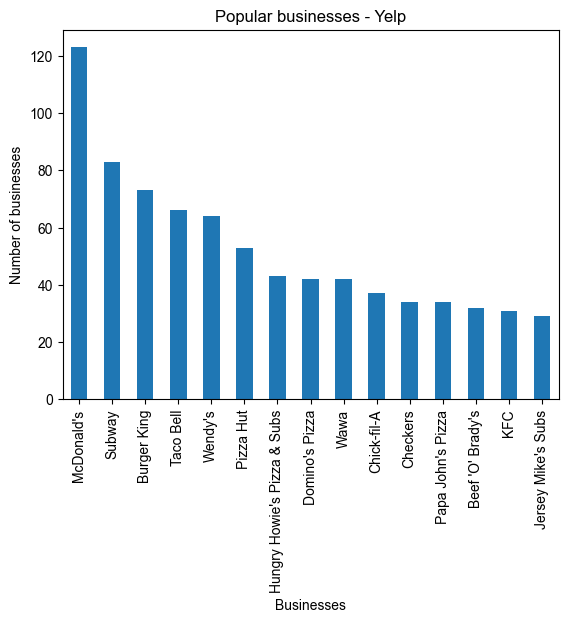

In [89]:
#Graficamos
top_yelp_business.plot.bar()
plt.xlabel('Businesses')
plt.ylabel('Number of businesses')
plt.title('Popular businesses - Yelp')
plt.show()

### Ciudades con más restaurantes según Yelp

In [26]:
#Agrupamos por ciudad de Florida contando el numero de negocios 
yelp_business_per_city=df_yelp_business.groupby('city')['business_id'].count()

#Agrupamos los valores de forma descendente y nos quedamos con los 25 mejores
yelp_business_per_city_sorted=yelp_business_per_city.sort_values(ascending=False).head(25)
yelp_business_per_city_sorted

city
Tampa               2959
Clearwater           678
Saint Petersburg     490
St. Petersburg       403
Brandon              326
Largo                310
New Port Richey      226
Palm Harbor          207
Riverview            198
Dunedin              188
Lutz                 178
Pinellas Park        167
Wesley Chapel        158
Spring Hill          153
Tarpon Springs       151
St Petersburg        121
Seminole             120
Plant City           111
Port Richey          106
Hudson                95
Oldsmar               87
Valrico               77
Clearwater Beach      77
St. Pete Beach        68
Madeira Beach         66
Name: business_id, dtype: int64

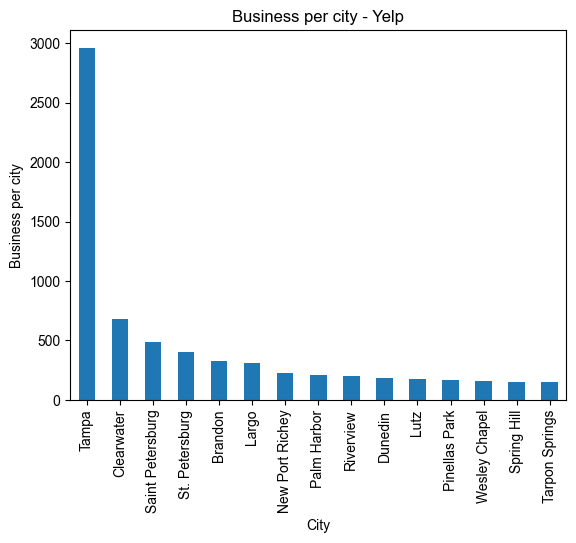

In [88]:
#Graficamos
yelp_business_per_city_sorted.head(15).plot.bar()
plt.xlabel('City')
plt.ylabel('Business per city')
plt.title('Business per city - Yelp')
plt.show()

### Cantidad de negocios por categoría en Yelp

In [28]:
# Dividir la columna 'categories' en elementos individuales
df_yelp_business['categories'] = df_yelp_business['categories'].str.split(', ')

In [29]:
#Separamos los elementos de la columna categories en distintos registros
df_yelp_business_exp = df_yelp_business.explode('categories')


In [30]:
#Verificamos que se haya realizado correctamente el explode
df_yelp_business_exp

,business_id,name,address,city,state,latitude,longitude,stars,review_count,categories
0,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,27.955269,-82.456320,4.0,10,Vietnamese
0,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,27.955269,-82.456320,4.0,10,Food
0,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,27.955269,-82.456320,4.0,10,Restaurants
0,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,27.955269,-82.456320,4.0,10,Food Trucks
1,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,27.916116,-82.760461,4.5,100,Food
...,...,...,...,...,...,...,...,...,...,...
8727,esBGrrmuZzSiECyRBoKvvA,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,27.770872,-82.643069,4.5,38,Beer Bar
8727,esBGrrmuZzSiECyRBoKvvA,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,27.770872,-82.643069,4.5,38,Nightlife
8727,esBGrrmuZzSiECyRBoKvvA,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,27.770872,-82.643069,4.5,38,Wine Bars
8727,esBGrrmuZzSiECyRBoKvvA,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,27.770872,-82.643069,4.5,38,Pizza


In [31]:
#Agrupamos el número de negocios por categoría
yelp_categories = df_yelp_business_exp.groupby('categories')['business_id'].count()

In [32]:
#Ordenamos de forma descendente quedandonos con los 15 mayores
yelp_categories=yelp_categories.sort_values(ascending=False).head(15)

In [33]:
yelp_categories

categories
Restaurants               8727
Food                      2654
Nightlife                 1546
American (Traditional)    1499
Bars                      1498
Sandwiches                1455
Breakfast & Brunch        1095
Fast Food                 1081
Pizza                     1071
American (New)            1011
Burgers                    903
Seafood                    846
Italian                    746
Mexican                    687
Coffee & Tea               634
Name: business_id, dtype: int64

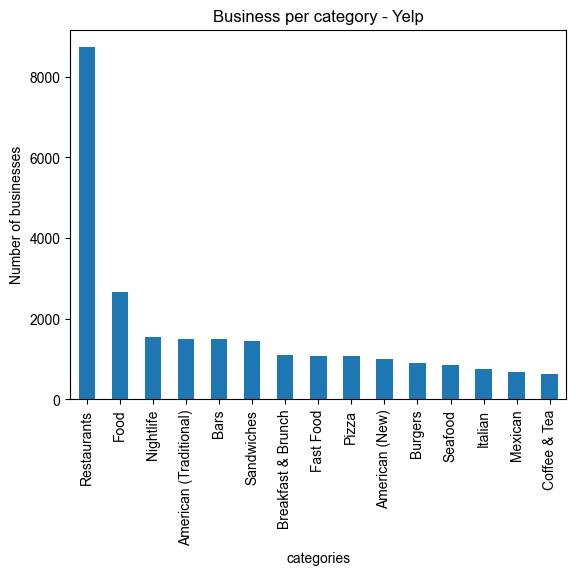

In [84]:
#Graficamos
yelp_categories.head(15).plot.bar()
plt.xlabel('categories')
plt.ylabel('Number of businesses')
plt.title('Business per category - Yelp')
plt.show()

### Cantidad de restaurants de Fast Food - Yelp

In [35]:
#Filtro los restaurants por categoría Fast Food
yelp_fast_food=df_yelp_business_exp[df_yelp_business_exp['categories']=='Fast Food']
yelp_fast_food

,business_id,name,address,city,state,latitude,longitude,stars,review_count,categories
7,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,10160 Ulmerton Rd,Largo,FL,27.894167,-82.779866,3.0,19,Fast Food
10,QjV4v7q_pt7tt3K1US7IHg,PDQ Temple Terrace,5112 E Fowler Ave,Tampa,FL,28.054888,-82.399548,3.0,5,Fast Food
11,CtMEJxpVMlNzFpB4PtFjfA,Aussie Grill,25340 Sierra Center Blvd,Lutz,FL,28.192191,-82.396367,4.0,75,Fast Food
20,SRexiuEsx1d9-dZVUsssQA,Brandon Burgers,1513 W Brandon Blvd,Brandon,FL,27.937370,-82.307700,3.5,24,Fast Food
38,A1lAqN3SOaBLoo6NqVcy4Q,McDonald's,11110 Causeway Blvd,Brandon,FL,27.925332,-82.325395,2.0,6,Fast Food
...,...,...,...,...,...,...,...,...,...,...
8698,H6XVYi1r_izWboVqVuUwlQ,Chick-fil-A,3423 Ulmerton Rd,Clearwater,FL,27.894338,-82.680605,3.0,84,Fast Food
8707,hezQG50YXqdgxkhl2R9OuQ,Taco Bell,7620 West Hillsborough Avenue,Tampa,FL,27.996400,-82.565400,1.5,30,Fast Food
8708,k5q9hgRV2MPdWQChe9NSXQ,Arby's,6640 Ulmerton Rd,Largo,FL,27.893232,-82.729891,3.0,17,Fast Food
8720,oNeZmmoO7OCyT2vSsVnGKw,Coney Island Sandwich Shop,250 Dr Martin Luther King Jr St N,St Petersburg,FL,27.774380,-82.646986,4.0,109,Fast Food


Revisamos el número de restaurants de Fast Food que hay en Yelp

In [36]:
#Contamos el número de restaurants de Fast Food de Yelp
yelp_fast_food['name'].count()

1081

In [37]:
#Contamos cuántos restaurants hay de cada fast food
yelp_fast_food_count=yelp_fast_food['name'].value_counts()
yelp_fast_food_count.head(25)

name
McDonald's                                 123
Subway                                      80
Burger King                                 72
Taco Bell                                   66
Wendy's                                     64
Pizza Hut                                   45
Chick-fil-A                                 37
Checkers                                    34
KFC                                         31
Jersey Mike's Subs                          29
Jimmy John's                                28
Chipotle Mexican Grill                      27
Popeyes Louisiana Kitchen                   23
Firehouse Subs                              22
Five Guys                                   19
Steak ’n Shake                              19
Culver's                                    18
Arby's                                      17
Dairy Queen Grill & Chill                   12
Pollo Tropical                              12
Sonic Drive-In                              12
Panda Ex

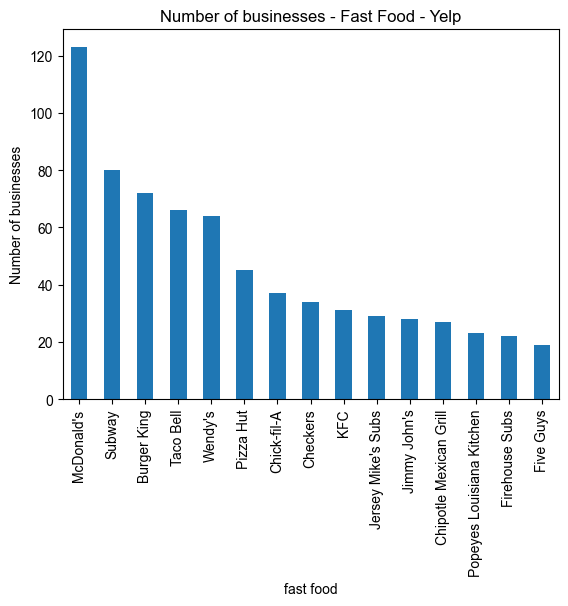

In [83]:
#Graficamos
yelp_fast_food_count.head(15).plot.bar()
plt.xlabel('fast food')
plt.ylabel('Number of businesses')
plt.title('Number of businesses - Fast Food - Yelp')
plt.show()

### Ciudades donde hay más restaurants de Fast Food - Yelp

In [39]:
#Contamos las ciudades con más restaurants de Fast Food
city_yelp_fast_food=yelp_fast_food['city'].value_counts()
city_yelp_fast_food.head(15)

city
Tampa               342
Clearwater           81
Saint Petersburg     55
Largo                51
Brandon              51
Riverview            42
St. Petersburg       38
Lutz                 32
New Port Richey      31
Pinellas Park        30
Plant City           29
Spring Hill          28
Wesley Chapel        22
Seminole             20
Port Richey          18
Name: count, dtype: int64

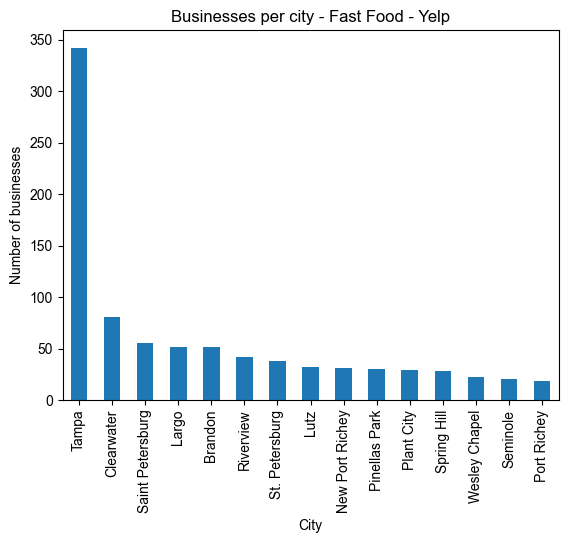

In [82]:
#Graficamos
city_yelp_fast_food.head(15).plot.bar()
plt.xlabel('City')
plt.ylabel('Number of businesses')
plt.title('Businesses per city - Fast Food - Yelp')
plt.show()

### Google Maps Businesses

### Restaurantes mejor rankeados de Google Maps

Vamos a determinar los 25 restaurants mejor rankeados dentro de Google Maps

In [41]:
#Calculo un promedio de rating por negocio 
gmap_business_rating = df_gmap_business.groupby('name')['avg_rating'].mean()

#Ordeno de forma descendente y opto por quedarme con los 25 mejor valorados
top_business_rating = gmap_business_rating.sort_values(ascending=False).head(25)
print(top_business_rating)

name
Grit Scratch Kitchen                   5.0
Shelborne Cafe                         5.0
Glaze Cafe                             5.0
Go Juice                               5.0
Gocki's @ Havana Trading Company       5.0
Godfather's Pizza                      5.0
Big Lock Mobile kitchen, LLC           5.0
Shnitz N Fritz                         5.0
Shintaro Japanese Restaurant           5.0
Big Daddy's Roasted Corn & Potatoes    5.0
Gaia Donut                             5.0
Good Fortune Juicery & Kitchen         5.0
Goofy Foot Grill                       5.0
Verona Ristorante                      5.0
Seoul Delights                         5.0
Veronica Wellness Center               5.0
Graham boys bbq                        5.0
Gran Sabana Latin food                 5.0
Giuseppe’s Gourmet Grill               5.0
Giovanni’s Italian restaurant          5.0
Gio's Fresh Mediterranean              5.0
Gina’s Pizzeria                        5.0
Garden Bistro                          5.0
Garden

### Restaurantes más populares de Google Maps

Voy a determinar los restaurants con mayor cantidad de negocios

In [85]:
#Contamos las valoraciones por negocio
count_gmap_business = df_gmap_business['name'].value_counts()
count_gmap_business.head(15)

name
Subway               538
Shell                119
Waffle House         113
McDonald's           102
Dunkin'              101
Domino's Pizza        98
Papa John's Pizza     74
Pizza Hut             68
Wendy's               59
Starbucks             58
Jimmy John's          56
Pizza Hut Express     55
Smoothie King         54
Burger King           53
Wawa                  52
Name: count, dtype: int64

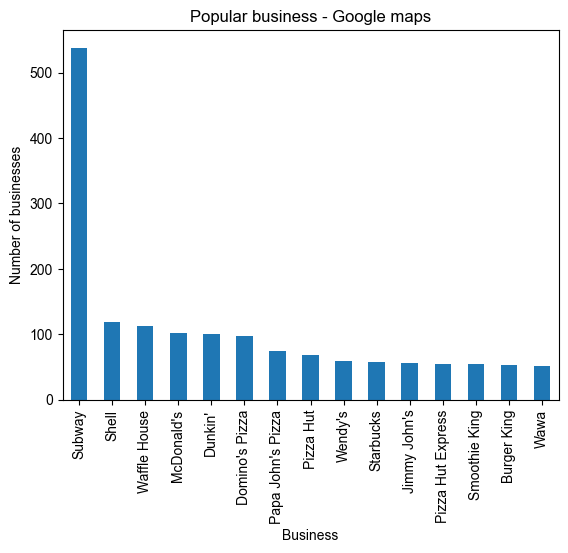

In [90]:
#Graficamos
plt.rcParams["font.family"] = "Arial"
count_gmap_business.head(15).plot.bar()
plt.xlabel('Business')
plt.ylabel('Number of businesses')
plt.title('Popular business - Google maps')
plt.show()

### Ciudades con más restaurantes según Google Maps

In [45]:
#Creamos una función para extraer la ciudad del address
def extraer_ciudad(direccion):
    partes = direccion.split(',')
    
    # Comprobar si hay suficientes partes
    if len(partes) >= 2:
        ciudad = partes[-2].strip()
        return ciudad
    else:
        return "No se encontró ciudad"


In [46]:
#Aplicamos la función a la columna address
df_gmap_business['city'] = df_gmap_business['address'].apply(extraer_ciudad)

In [47]:
#Verificamos la creación de la columna city
df_gmap_business.head()

,name,address,gmap_id,category,avg_rating,state,contains_keyword,city
0,Cape Seafood Shack,"Cape Seafood Shack, 603 Del Prado Blvd S, Cape...",0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,['Restaurant'],5.0,FL,True,Cape Coral
1,Fresh Point Country Buffet,"Fresh Point Country Buffet, 10525 US-19, Pinel...",0x88c2e4e34f1ed783:0x76c5da381c499d79,['Buffet restaurant'],5.0,FL,True,Pinellas Park
2,Hot Box,"Hot Box, 1-99 Kinkaid St, Pensacola, FL 32507",0x8890b9241e704667:0x3a1e565c17c00993,['Restaurant'],4.2,FL,True,Pensacola
3,Gormley's on the river | Modern cuisine in his...,Gormley's on the river | Modern cuisine in his...,0x8894b5a7a7909725:0xe4687299fd288188,"['Modern French restaurant', 'Restaurant']",4.3,FL,True,Apalachicola
4,Shell,"Shell, 15877 E, FL-40, Silver Springs, FL 34488",0x88e635378f43352f:0xa1b53c63436fa428,"['Gas station', 'ATM', 'Convenience store', 'R...",1.8,FL,True,Silver Springs


In [48]:
#Agrupamos los negocios por ciudad
gmap_business_per_city=df_gmap_business.groupby('city')['gmap_id'].count()

#Ordenamos de manera descendente y me quedo con los 25 mejores
gmap_business_per_city_sorted=gmap_business_per_city.sort_values(ascending=False).head(25)
gmap_business_per_city_sorted

city
Miami              1185
Orlando             788
Tampa               611
Jacksonville        485
Miami Beach         264
Flushing            260
Fort Lauderdale     242
Boca Raton          233
Naples              231
Fort Myers          208
West Palm Beach     198
Sarasota            193
Tallahassee         175
Hollywood           163
Gainesville         162
Kissimmee           161
Hialeah             150
Pensacola           148
Florence            139
St. Petersburg      137
Clearwater          135
Bradenton           121
Brooklyn            119
Ocala               105
St. Augustine       100
Name: gmap_id, dtype: int64

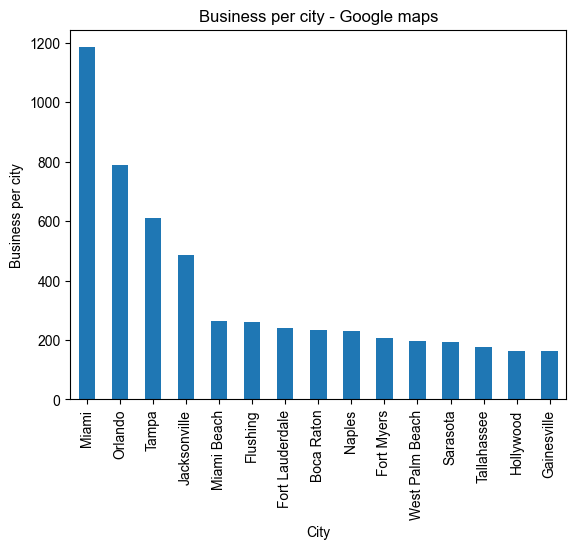

In [49]:
#Graficamos
gmap_business_per_city_sorted.head(15).plot.bar()
plt.xlabel('City')
plt.ylabel('Business per city')
plt.title('Business per city - Google maps')
plt.show()

### Cantidad de negocios por categoría en Google Maps

In [50]:
#Trabajamos las categorías
df_gmap_business['category'] = df_gmap_business['category'].str.strip("[]").str.split(', ')

In [51]:
#Observamos la columna category
df_gmap_business['category']

0                                           ['Restaurant']
1                                    ['Buffet restaurant']
2                                           ['Restaurant']
3               ['Modern French restaurant', 'Restaurant']
4        ['Gas station', 'ATM', 'Convenience store', 'R...
                               ...                        
17238                                       ['Restaurant']
17239                                       ['Restaurant']
17240                               ['Seafood restaurant']
17241    ['Sports nutrition store', 'Fitness center', '...
17242                  ['Gift shop', 'Cafe', 'Restaurant']
Name: category, Length: 17243, dtype: object

In [52]:
#Hacemos un explode para separar el contenido de la columna category en varios registros
df_gmap_business_exp = df_gmap_business.explode('category')

In [53]:
#Verificamos el explode
df_gmap_business_exp

,name,address,gmap_id,category,avg_rating,state,contains_keyword,city
0,Cape Seafood Shack,"Cape Seafood Shack, 603 Del Prado Blvd S, Cape...",0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,'Restaurant',5.0,FL,True,Cape Coral
1,Fresh Point Country Buffet,"Fresh Point Country Buffet, 10525 US-19, Pinel...",0x88c2e4e34f1ed783:0x76c5da381c499d79,'Buffet restaurant',5.0,FL,True,Pinellas Park
2,Hot Box,"Hot Box, 1-99 Kinkaid St, Pensacola, FL 32507",0x8890b9241e704667:0x3a1e565c17c00993,'Restaurant',4.2,FL,True,Pensacola
3,Gormley's on the river | Modern cuisine in his...,Gormley's on the river | Modern cuisine in his...,0x8894b5a7a7909725:0xe4687299fd288188,'Modern French restaurant',4.3,FL,True,Apalachicola
3,Gormley's on the river | Modern cuisine in his...,Gormley's on the river | Modern cuisine in his...,0x8894b5a7a7909725:0xe4687299fd288188,'Restaurant',4.3,FL,True,Apalachicola
...,...,...,...,...,...,...,...,...
17241,Lvstronglife Protein Bar/Waffles/Shakes/Energy...,Lvstronglife Protein Bar/Waffles/Shakes/Energy...,0x80c8db809e5b9ff1:0xec68ec066cbe4305,'Fitness center',5.0,FL,True,Las Vegas
17241,Lvstronglife Protein Bar/Waffles/Shakes/Energy...,Lvstronglife Protein Bar/Waffles/Shakes/Energy...,0x80c8db809e5b9ff1:0xec68ec066cbe4305,'Health food restaurant',5.0,FL,True,Las Vegas
17242,Rainforest Cafe Shop-Animal Kingdom,"Rainforest Cafe Shop-Animal Kingdom, Walt Disn...",0x88dd7e9025eb74fd:0xad4f436b44654d23,'Gift shop',3.8,FL,True,Kissimmee
17242,Rainforest Cafe Shop-Animal Kingdom,"Rainforest Cafe Shop-Animal Kingdom, Walt Disn...",0x88dd7e9025eb74fd:0xad4f436b44654d23,'Cafe',3.8,FL,True,Kissimmee


In [54]:
#Reemplazamos en la columna category las comillas por vacío
df_gmap_business_exp['category'] = df_gmap_business_exp['category'].str.replace("'",'')

In [55]:
#Agrupamos y contamos los negocios por categoría
gmap_categories = df_gmap_business_exp.groupby('category')['name'].count()

In [56]:
#Ordenamos de forma descendente y me quedo con los 15 mejores
gmap_categories_sorted=gmap_categories.sort_values(ascending=False).head(15)
gmap_categories_sorted

category
Restaurant              8407
Fast food restaurant    2027
Takeout Restaurant      1608
Pizza restaurant        1518
Sandwich shop           1435
American restaurant     1425
Breakfast restaurant    1166
Caterer                 1160
Mexican restaurant       898
Chinese restaurant       783
Italian restaurant       773
Delivery Restaurant      755
Seafood restaurant       741
Bar                      734
Coffee shop              694
Name: name, dtype: int64

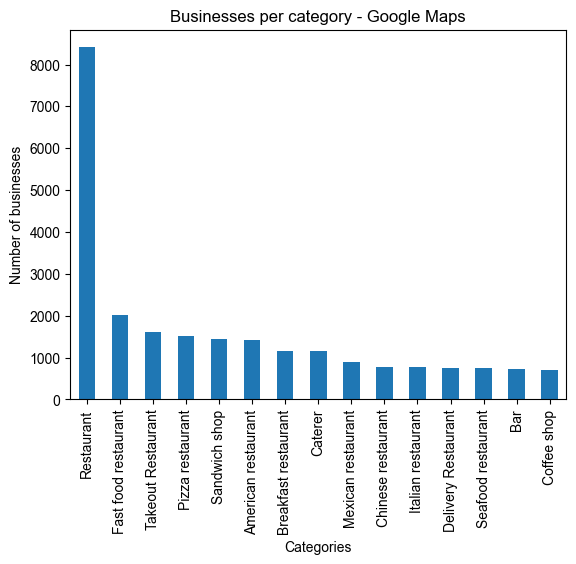

In [91]:
#Graficamos
gmap_categories_sorted.head(15).plot.bar()
plt.xlabel('Categories')
plt.ylabel('Number of businesses')
plt.title('Businesses per category - Google Maps')
plt.show()

### Cantidad de restaurants de Fast Food - Google Maps

In [58]:
#Filtro los restaurants de la categoría fast food
gmap_fast_food=df_gmap_business_exp[df_gmap_business_exp['category']=='Fast food restaurant']
gmap_fast_food

,name,address,gmap_id,category,avg_rating,state,contains_keyword,city
13,SUBWAY®Restaurants,"SUBWAY®Restaurants, 5 S Fletcher Rd, Chelsea, ...",0x883cc9750a456b4f:0x1842fa7ecb22156a,Fast food restaurant,2.3,FL,True,Chelsea
15,Subway,"Subway, 588 S Alafaya Trail #30, Orlando, FL 3...",0x88e76652cd84272f:0x548abb9935d912ff,Fast food restaurant,4.0,FL,True,Orlando
33,Subway,"Subway, 3811 Main Street First Floor, Bridgepo...",0x89e80ec1fc8dbc35:0xa49216fa8d10e33c,Fast food restaurant,3.7,FL,True,Bridgeport
42,Subway,"Subway, 1334 Flammang Dr, Waterloo, IA 50702",0x87e5523d8c4ac7ff:0x7201d649e8ef09e1,Fast food restaurant,3.0,FL,True,Waterloo
50,Quiznos,"Quiznos, 9802 Baymeadows Rd #4, Jacksonville, ...",0x88e5cafa2cc609df:0x1881abd90aaa0c3,Fast food restaurant,3.0,FL,True,Jacksonville
...,...,...,...,...,...,...,...,...
17204,Aussie Grill,"Aussie Grill, 459 Brandon Town Center Dr, Bran...",0x88c2cf0d4f4c6a99:0xd1ee87b2845de4e7,Fast food restaurant,3.2,FL,True,Brandon
17208,Miami Grill South Beach,"Miami Grill South Beach, 1541 Washington Ave, ...",0x88d9b48ffd8f089d:0x48a5cc039b3ae674,Fast food restaurant,4.1,FL,True,Miami Beach
17216,Subway,"Subway, 1119 FL-100, Florahome, FL 32140",0x88e60d5b8a76c313:0x57561dcf135a5146,Fast food restaurant,3.7,FL,True,Florahome
17219,Subway,"Subway, 101 N Howard Ave, Tampa, FL 33606",0x88c2c37b07ffa271:0x31ae6d85051273e3,Fast food restaurant,3.7,FL,True,Tampa


#Contamos el número de restaurants de fast food que hay según Google Maps

In [59]:
#Cuento el total de restaurants de fast food 
gmap_fast_food['name'].count()


2027

In [60]:
#Cuento cuántos restaurants hay de cada franquicia
gmap_fast_food_count=gmap_fast_food['name'].value_counts()
gmap_fast_food_count.head(25)

name
Subway                       533
McDonald's                   102
Dunkin'                      100
Wendy's                       58
Smoothie King                 53
Wawa                          52
Burger King                   50
Jimmy John's                  45
Chick-fil-A                   42
Taco Bell                     37
Dunkin                        34
Flame Broiler                 33
Little Caesars Pizza          31
SUBWAY®Restaurants            23
Jersey Mike's Subs            21
KFC                           19
Popeyes Louisiana Kitchen     18
Chipotle Mexican Grill        18
Arby's                        17
The Flame Broiler             15
Quiznos                       14
Charleys Cheesesteaks         13
Subway Restaurants            13
Sbarro                        12
Checkers                      12
Name: count, dtype: int64

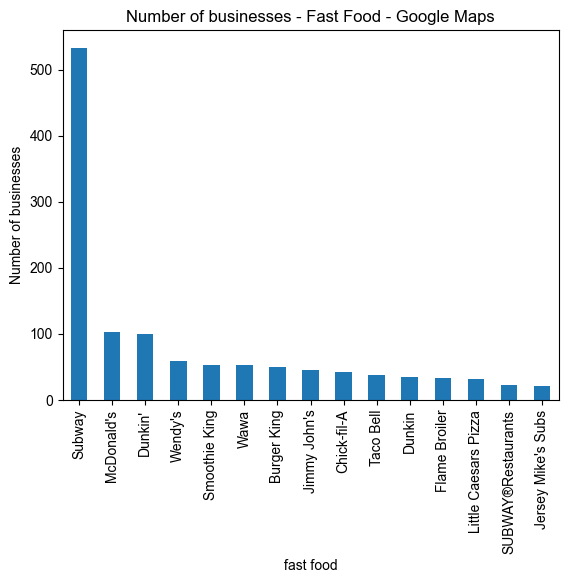

In [76]:
#Graficamos
gmap_fast_food_count.head(15).plot.bar()
plt.xlabel('fast food')
plt.ylabel('Number of businesses')
plt.title('Number of businesses - Fast Food - Google Maps')
plt.show()

### Ciudades donde hay más restaurants de Fast Food - Google Maps

In [62]:
#Contamos las ciudades con más restaurants de Fast Food
city_gmap_fast_food=gmap_fast_food['city'].value_counts()
city_gmap_fast_food.head(15)

city
Miami              123
Orlando             92
Tampa               62
Jacksonville        53
Fort Myers          34
Naples              32
Pensacola           27
Fort Lauderdale     26
Gainesville         23
Boca Raton          21
Lakeland            19
Hialeah             19
Tallahassee         18
West Palm Beach     17
Flint               16
Name: count, dtype: int64

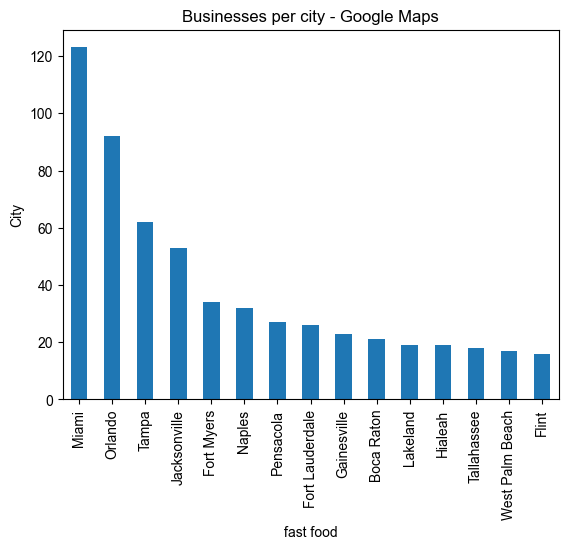

In [92]:
#Graficamos
city_gmap_fast_food.head(15).plot.bar()
plt.xlabel('fast food')
plt.ylabel('City')
plt.title('Businesses per city - Google Maps')
plt.show()

## Yelp reviews

### Reviews por año de Yelp

In [64]:
#Vemos el contenido de la columna date y lo pasamos a datetime
df_yelp_reviews['date'] = pd.to_datetime(df_yelp_reviews['date'])

In [65]:
#Agrupamos las reviews por año 
review_counts_by_year = df_yelp_reviews.groupby(df_yelp_reviews['date'].dt.year)['text'].size().reset_index(name='count')
review_counts_by_year

,date,count
0,2017,97042
1,2018,111241
2,2019,112336
3,2020,75413
4,2021,88784
5,2022,4748


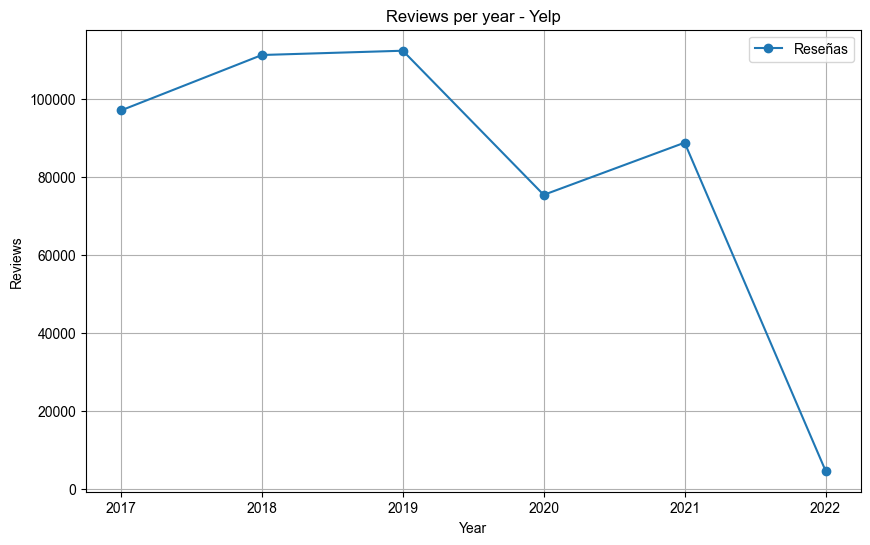

In [79]:
#Graficamos
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico según tus preferencias

# Grafica el recuento de reseñas por año
plt.plot(review_counts_by_year['date'], review_counts_by_year['count'], marker='o', linestyle='-')

# Etiqueta los ejes y agrega un título
plt.xlabel('Year')
plt.ylabel('Reviews')
plt.title('Reviews per year - Yelp')

# Agrega una leyenda
plt.legend(['Reseñas'])

# Muestra el gráfico
plt.grid(True)  # Agrega una cuadrícula
plt.show()

### Wordcloud reseñas Yelp

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


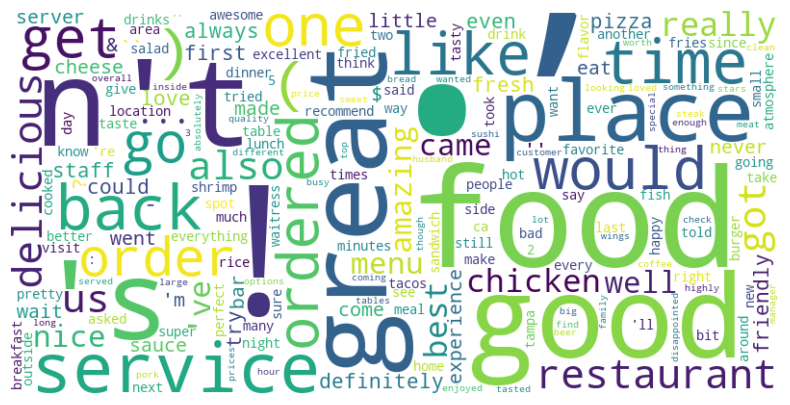

In [67]:
# Tokenización y eliminación de palabras vacías (stop words)
nltk.download("stopwords")
nltk.download("punkt")
stop_words = set(stopwords.words("english"))  # Utiliza las stopwords en inglés
words = [word.lower() for resena in df_yelp_reviews['text'] for word in word_tokenize(resena) if word.lower() not in stop_words]

# Calcular la frecuencia de las palabras
word_freq = nltk.FreqDist(words)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Google Maps Reviews

### Reviews por año de Google Maps

In [68]:
#Pasamos el contenido de la columna time a datetime
df_gmap_reviews['time'] = pd.to_datetime(df_gmap_reviews['time'])

In [69]:
#Agrupamos y contamos las reviews por año
gmap_reviews_counts_by_year = df_gmap_reviews.groupby(df_gmap_reviews['time'].dt.year)['text'].size().reset_index(name='count')
gmap_reviews_counts_by_year

,time,count
0,2017,71715
1,2018,152649
2,2019,189516
3,2020,108611
4,2021,73895


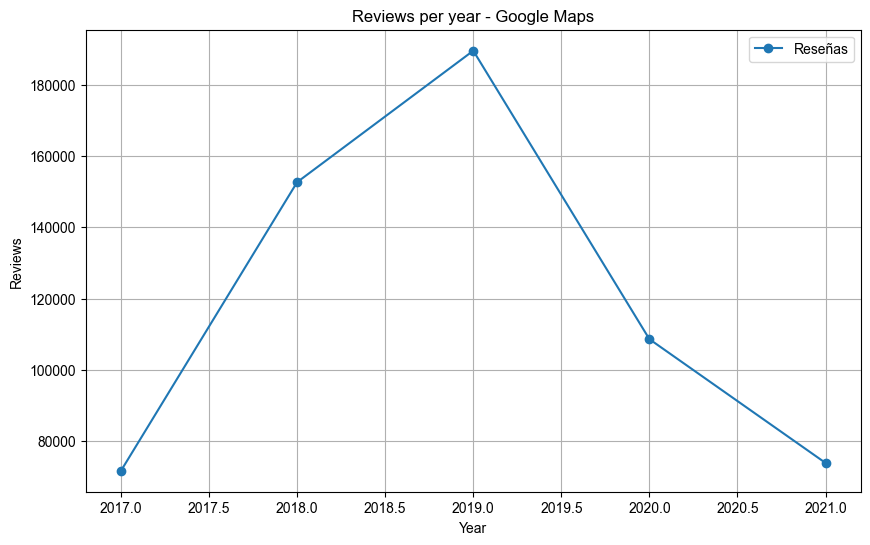

In [80]:
#Graficamos
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico según tus preferencias

# Grafica el recuento de reseñas por año
plt.plot(gmap_reviews_counts_by_year['time'], gmap_reviews_counts_by_year['count'], marker='o', linestyle='-')

# Etiqueta los ejes y agrega un título
plt.xlabel('Year')
plt.ylabel('Reviews')
plt.title('Reviews per year - Google Maps')

# Agrega una leyenda
plt.legend(['Reseñas'])

# Muestra el gráfico
plt.grid(True)  # Agrega una cuadrícula
plt.show()

### Wordcloud reseñas Google Maps

In [71]:
#Convertimos el contenido de la columna text a string
df_gmap_reviews['text']=df_gmap_reviews['text'].astype(str)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


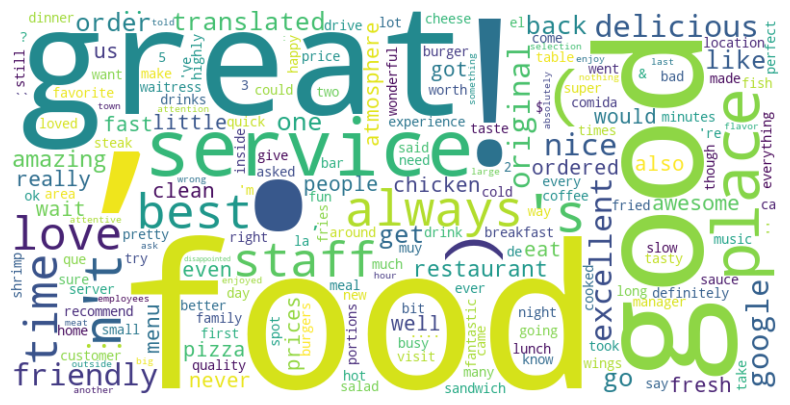

In [72]:
# Tokenización y eliminación de palabras vacías (stop words)
nltk.download("stopwords")
nltk.download("punkt")
stop_words = set(stopwords.words("english"))  # Utiliza las stopwords en inglés
words = [word.lower() for resena in df_gmap_reviews['text'] for word in word_tokenize(resena) if word.lower() not in stop_words]

# Calcular la frecuencia de las palabras
word_freq = nltk.FreqDist(words)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()